In [8]:
# test with true label 
from tensorflow import keras
import cv2
import numpy as np
import os
import pandas as pd

np.set_printoptions(suppress=True)

# Load the trained model
dog_model = keras.models.load_model('128dogs.h5')

# Function to prepare the image
def prepare_specificmodel(filepath):
    IMG_SIZE = 299
    img_array = cv2.imread(filepath)[...,::-1]
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

# Get all the dog category names
dog_categories = []

for root, dirs, files in os.walk("/Users/suare/Desktop/dogs/images1/Images"): 
    for dir_name in dirs:
        dog_categories.append(dir_name)

# Load true labels from labels.csv
labels_df = pd.read_csv('labels.csv')  # Replace with the actual path to your labels.csv file

# Directory containing test images
test_images_dir = './testing'  # Replace with the actual path

1/1 [==============================] - 0s 109ms/step


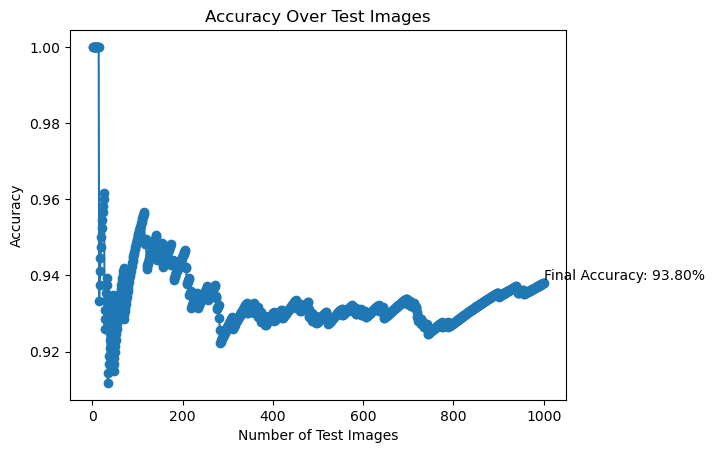

In [6]:
import matplotlib.pyplot as plt

# Initialize variables for counting correct and total predictions
correct_predictions = 0
total_predictions = 0

# Lists to store accuracy data for plotting
accuracies = []

# Loop through test images
for filename in os.listdir(test_images_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        image_path = os.path.join(test_images_dir, filename)

        # Model recognition
        prediction = dog_model.predict([prepare_specificmodel(image_path)])
        predicted_breed = dog_categories[np.argmax(prediction)]

        # Check if the filename has a corresponding entry in labels.csv
        matching_entries = labels_df[labels_df['id'].apply(lambda x: x in filename)]

        if not matching_entries.empty:
            # Get the true label from the labels.csv file
            true_label = matching_entries['breed'].values[0]

            # Check if the prediction is correct
            if true_label.lower() in predicted_breed.lower():
                correct_predictions += 1

            total_predictions += 1

        # Calculate accuracy at each step and store in the accuracies list
        accuracy = correct_predictions / total_predictions
        accuracies.append(accuracy)

# Plotting the accuracy graph
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o')
plt.title('Accuracy Over Test Images')
plt.xlabel('Number of Test Images')
plt.ylabel('Accuracy')

# Adding the final accuracy as text
final_accuracy = accuracies[-1]
plt.text(len(accuracies) + 1, final_accuracy, f'Final Accuracy: {final_accuracy:.2%}', verticalalignment='bottom')

plt.show()



In [8]:
# test with true label 
from tensorflow import keras
import cv2
import numpy as np
import os
import pandas as pd
from keras.utils import CustomObjectScope

np.set_printoptions(suppress=True)

# Load the trained model
dog_model = keras.models.load_model('128dogsefficet.h5')

# Function to prepare the image
def prepare_specificmodel(filepath):
    IMG_SIZE = 299
    img_array = cv2.imread(filepath)[...,::-1]
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

# Get all the dog category names
dog_categories = []

for root, dirs, files in os.walk("/Users/suare/Desktop/dogs/images1/Images"): 
    for dir_name in dirs:
        dog_categories.append(dir_name)

# Load true labels from labels.csv
labels_df = pd.read_csv('labels.csv')  # Replace with the actual path to your labels.csv file

# Directory containing test images
test_images_dir = './testing'  # Replace with the actual path

ValueError: Unknown layer: 'FixedDropout'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [ ]:
import matplotlib.pyplot as plt

# Initialize variables for counting correct and total predictions
correct_predictions = 0
total_predictions = 0

# Lists to store accuracy data for plotting
accuracies = []

# Loop through test images
for filename in os.listdir(test_images_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        image_path = os.path.join(test_images_dir, filename)

        # Model recognition
        prediction = dog_model.predict([prepare_specificmodel(image_path)])
        predicted_breed = dog_categories[np.argmax(prediction)]

        # Check if the filename has a corresponding entry in labels.csv
        matching_entries = labels_df[labels_df['id'].apply(lambda x: x in filename)]

        if not matching_entries.empty:
            # Get the true label from the labels.csv file
            true_label = matching_entries['breed'].values[0]

            # Check if the prediction is correct
            if true_label.lower() in predicted_breed.lower():
                correct_predictions += 1

            total_predictions += 1

        # Calculate accuracy at each step and store in the accuracies list
        accuracy = correct_predictions / total_predictions
        accuracies.append(accuracy)

# Plotting the accuracy graph
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o')
plt.title('Accuracy Over Test Images')
plt.xlabel('Number of Test Images')
plt.ylabel('Accuracy')

# Adding the final accuracy as text
final_accuracy = accuracies[-1]
plt.text(len(accuracies) + 1, final_accuracy, f'Final Accuracy: {final_accuracy:.2%}', verticalalignment='bottom')

plt.show()

